Import necessary data analysis and processing tools

In [1]:
import os
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt 
import seaborn as sns
import scipy.stats as stats
pd.set_option('display.max_rows', None) 
pd.set_option('display.max_columns', None)
from sklearn.preprocessing import LabelEncoder


Loading our initial dataset into a Dataframe df

In [2]:
df = pd.read_csv('FINAL.csv', header = 0)

Inspecting the Data we collected

1) Size of our dataset
2) Displaying our column names
3) Display first few rows of our data

In [3]:
print(df.shape)
print(df.columns)
df.head(10)

(17673, 62)
Index(['user_id', 'user_win_rate', 'user_lose_rate', 'user_draw_rate',
       'user_game_count', 'user_blitz_rating', 'user_rating_bin',
       'user_white_win_rate', 'user_white_lose_rate', 'user_white_draw_rate',
       'user_white_game_count', 'user_black_win_rate', 'user_black_lose_rate',
       'user_black_draw_rate', 'user_black_game_count', 'user_top_eco',
       'user_second_eco', 'user_top_winrate_eco', 'user_second_winrate_eco',
       'user_mate_winrate', 'user_resign_winrate', 'user_time_winrate',
       'user_mate_lossrate', 'user_resign_lossrate', 'user_time_lossrate',
       'user_average_game_len', 'user_rating_deviation',
       'user_blitz_total_games', 'user_best_win_1', 'user_best_win_2',
       'user_best_win_3', 'op_id', 'op_win_rate', 'op_lose_rate',
       'op_draw_rate', 'op_game_count', 'op_blitz_rating', 'op_white_win_rate',
       'op_white_lose_rate', 'op_white_draw_rate', 'op_white_game_count',
       'op_black_win_rate', 'op_black_lose_rate', 

,user_id,user_win_rate,user_lose_rate,user_draw_rate,user_game_count,user_blitz_rating,user_rating_bin,user_white_win_rate,user_white_lose_rate,user_white_draw_rate,user_white_game_count,user_black_win_rate,user_black_lose_rate,user_black_draw_rate,user_black_game_count,user_top_eco,user_second_eco,user_top_winrate_eco,user_second_winrate_eco,user_mate_winrate,user_resign_winrate,user_time_winrate,user_mate_lossrate,user_resign_lossrate,user_time_lossrate,user_average_game_len,user_rating_deviation,user_blitz_total_games,user_best_win_1,user_best_win_2,user_best_win_3,op_id,op_win_rate,op_lose_rate,op_draw_rate,op_game_count,op_blitz_rating,op_white_win_rate,op_white_lose_rate,op_white_draw_rate,op_white_game_count,op_black_win_rate,op_black_lose_rate,op_black_draw_rate,op_black_game_count,op_top_eco,op_second_eco,op_top_winrate_eco,op_second_winrate_eco,op_mate_winrate,op_resign_winrate,op_time_winrate,op_mate_lossrate,op_resign_lossrate,op_time_lossrate,op_average_game_len,op_rating_deviation,op_blitz_total_games,op_best_win_1,op_best_win_2,op_best_win_3,game_result
0,kamal_balaiannnnn,50.0,48.0,2.0,100.0,1077.0,1060-1079,47.692,50.769,1.538,65.0,43.333,55.000,1.667,60.0,C40,C34,B12,A45,0.386,0.439,0.158,0.545,0.167,0.258,367.0,56.63,422.0,1220.0,1205.0,1202.0,TIMFAKS,54.0,39.0,7.0,100.0,1119.0,45.161,48.387,6.452,62.0,47.619,47.619,4.762,63.0,C42,C50,D20,C55,0.379,0.414,0.172,0.433,0.167,0.400,272.0,45.28,1984.0,1412.0,1410.0,1390.0,-1.0
1,jenzetti,48.0,49.0,3.0,100.0,1359.0,1340-1359,51.562,45.312,3.125,64.0,45.902,54.098,0.000,61.0,C50,B28,A13,C40,0.328,0.475,0.197,0.355,0.290,0.355,388.0,45.00,2010.0,1517.0,1512.0,1500.0,Amisree,48.0,49.0,3.0,100.0,1354.0,56.452,38.710,4.839,62.0,42.857,57.143,0.000,63.0,C41,C23,C20,C01,0.161,0.516,0.242,0.633,0.000,0.350,381.0,78.88,208.0,1460.0,1445.0,1440.0,-1.0
2,hermar,47.0,51.0,2.0,100.0,1609.0,1600-1619,50.000,48.333,1.667,60.0,44.615,46.154,9.231,65.0,D02,A40,D11,C40,0.271,0.525,0.203,0.203,0.407,0.390,379.0,49.82,1582.0,1729.0,1704.0,1687.0,Rufusikik9999,57.0,36.0,6.0,100.0,1603.0,48.438,45.312,6.250,64.0,50.820,42.623,6.557,61.0,C44,C50,B32,C72,0.355,0.435,0.210,0.327,0.491,0.145,410.0,46.78,1023.0,1624.0,1618.0,1616.0,-1.0
3,HakobN,53.0,43.0,4.0,100.0,2379.0,2360-2379,59.375,32.812,7.812,64.0,45.902,45.902,8.197,61.0,B23,B00,A02,D04,0.197,0.636,0.167,0.245,0.714,0.041,277.0,46.15,7861.0,2782.0,2665.0,2664.0,NikolaDubovik,51.0,37.0,12.0,100.0,2088.0,50.820,37.705,11.475,61.0,42.188,48.438,9.375,64.0,B00,A02,A00,C31,0.345,0.310,0.293,0.444,0.444,0.111,253.0,47.09,16413.0,2710.0,2700.0,2697.0,1.0
4,Castillo123458789102,28.0,65.0,6.0,100.0,1057.0,1040-1059,30.357,58.929,10.714,56.0,44.928,44.928,10.145,69.0,B01,A40,A48,A09,0.375,0.375,0.208,0.281,0.547,0.141,329.0,52.74,671.0,1227.0,1216.0,1198.0,Bauti_Bomben,45.0,48.0,7.0,100.0,1063.0,57.143,38.095,4.762,63.0,43.548,50.000,6.452,62.0,C20,C41,C70,B50,0.349,0.302,0.333,0.345,0.418,0.236,358.0,45.23,2899.0,1823.0,1503.0,1456.0,-1.0
5,anacondaismypet,48.0,46.0,6.0,100.0,2235.0,2220-2239,53.226,38.710,8.065,62.0,53.968,42.857,3.175,63.0,D10,C02,C05,E26,0.179,0.627,0.194,0.216,0.647,0.137,448.0,46.97,799.0,2357.0,2350.0,2340.0,LomakinaGV,56.0,39.0,4.0,100.0,2125.0,60.317,36.508,3.175,63.0,48.387,43.548,8.065,62.0,A05,A04,A00,A45,0.088,0.618,0.279,0.120,0.540,0.340,413.0,45.06,9781.0,2313.0,2309.0,2296.0,1.0
6,Julio2019,25.0,73.0,2.0,100.0,1609.0,1600-1619,30.159,66.667,3.175,63.0,30.645,69.355,0.000,62.0,D00,B00,D30,A03,0.053,0.211,0.605,0.329,0.447,0.082,290.0,45.05,7457.0,2362.0,2341.0,2327.0,Remigio2023,44.0,52.0,4.0,100.0,1905.0,54.098,36.066,9.836,61.0,48.438,46.875,4.688,64.0,A06,A04,C42,D02,0.266,0.328,0.391,0.077,0.558,0.327,282.0,45.03,10470.0,2524.0,2418.0,2393.0,-1.0
7,kapri8,61.0,37.0,2.0,100.0,1213.0,1200-1219,57.377,37.705,4.918,61.0,51.562,48.438,0.000,64.0,B01,D00,C02,A03,0.309,0.529,0.132,0.111,0.852,0.019,449.0,45.30,1153.0,1336.0,1323.0,1320.0,ufyljybot,48.0,43.0,9.0,100.0,1366.0,40.678,49.153,10.169,59.0,48.485,43.9

Identifying missingness: If we have 0 in game_count for a user, we have missing values and should drop it

In [4]:
zero_count = (df == 0).sum()
zero_count

user_id                       0
user_win_rate               762
user_lose_rate              373
user_draw_rate             4194
user_game_count               0
user_blitz_rating             0
user_rating_bin               0
user_white_win_rate         386
user_white_lose_rate        189
user_white_draw_rate       2945
user_white_game_count       127
user_black_win_rate         403
user_black_lose_rate        188
user_black_draw_rate       2930
user_black_game_count       131
user_top_eco                  0
user_second_eco               0
user_top_winrate_eco          0
user_second_winrate_eco       0
user_mate_winrate           520
user_resign_winrate         513
user_time_winrate           703
user_mate_lossrate          421
user_resign_lossrate        635
user_time_lossrate         1238
user_average_game_len        58
user_rating_deviation         0
user_blitz_total_games       20
user_best_win_1             633
user_best_win_2             633
user_best_win_3             633
op_id   

We can see that there are many fields that contain 0 values. For some columns, we know that having a significant number of 0 values in their columns is a bad sign because when the lichess api breaks sometimes it imputs all 0's into the dataset. We should drop some of the rows containing the these values. For observation purposes we will draw out a few plots before cleaning the data.

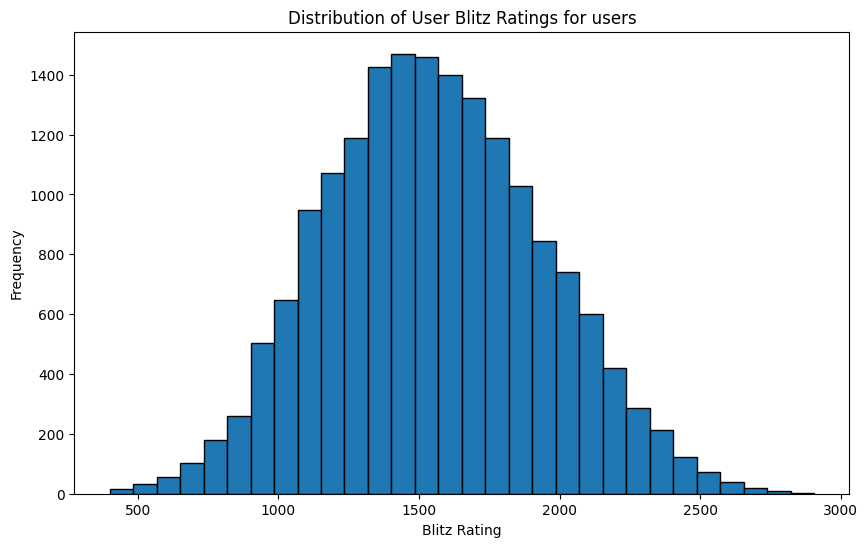

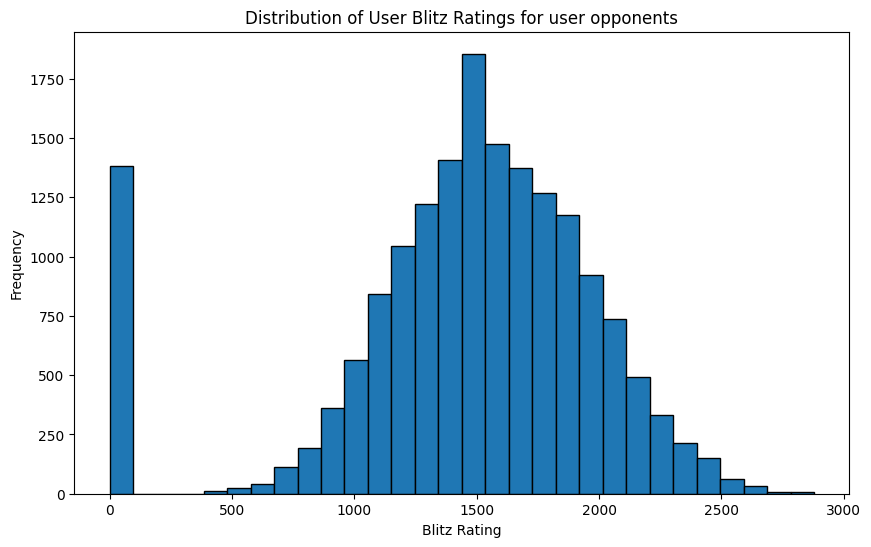

In [5]:
# Replace 'df' with the name of your DataFrame if it's different
plt.figure(figsize=(10, 6))
plt.hist(df['user_blitz_rating'], bins=30, edgecolor='black')
plt.title('Distribution of User Blitz Ratings for users')
plt.xlabel('Blitz Rating')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
plt.hist(df['op_blitz_rating'], bins=30, edgecolor='black')
plt.title('Distribution of User Blitz Ratings for user opponents')
plt.xlabel('Blitz Rating')
plt.ylabel('Frequency')
plt.show()

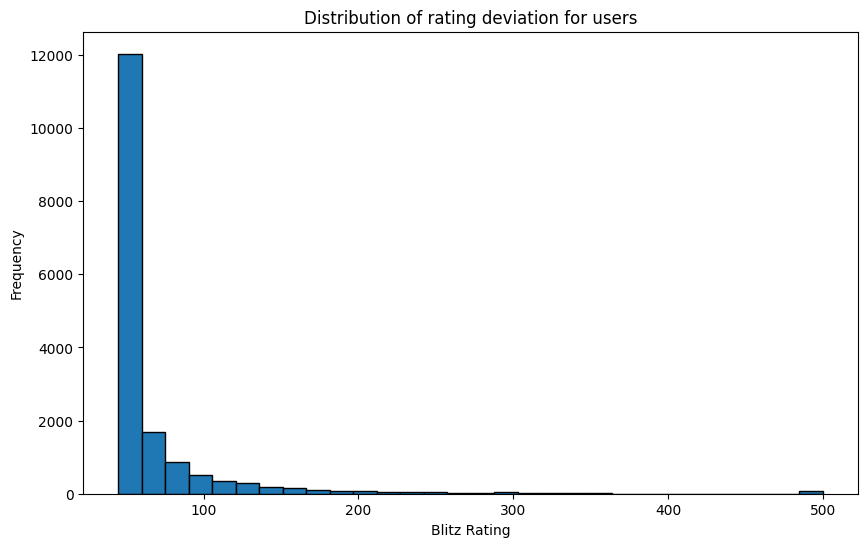

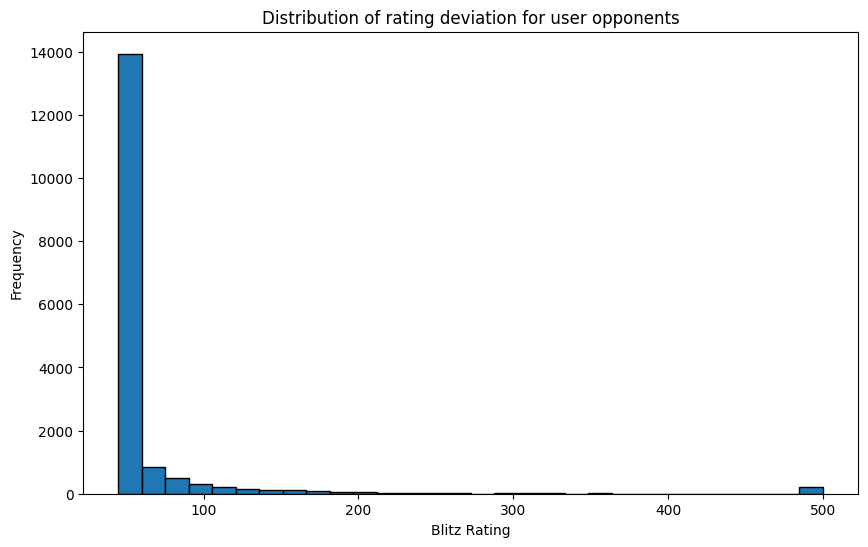

In [6]:
plt.figure(figsize=(10, 6))
plt.hist(df['user_rating_deviation'], bins=30, edgecolor='black')
plt.title('Distribution of rating deviation for users')
plt.xlabel('Blitz Rating')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
plt.hist(df['op_rating_deviation'], bins=30, edgecolor='black')
plt.title('Distribution of rating deviation for user opponents')
plt.xlabel('Blitz Rating')
plt.ylabel('Frequency')
plt.show()

When the rating deviation is around 45, we know the user has a relatively stable rating, from the graph we can see that most users in our dataset has a stable rating. The only thing we have to consider is the outliers of rating deviation at 0 and at 500. These data points will be dropped.

Now for some actual data cleaning.

1) Remove null values.
2) Remove all games, and sub-categories of the games that have counts of 0.
If the total number of games played by a user is less than 10, they aren't active enough in the game time control style. Thus they will be removed too.
Rating deviation outliers will be removed.

In [7]:
df = df.dropna()
game_counts = [
    'user_game_count',
    'op_game_count',
    'user_blitz_total_games',
    'op_blitz_total_games'
]
for column in game_counts:
    df = df[df[column] >= 10]
    
game_0s = [
    'user_win_rate',
    'user_lose_rate',
    'user_mate_winrate',
    'user_mate_lossrate',
    'op_win_rate',
    'op_lose_rate',
    'op_mate_winrate',
    'op_mate_lossrate',
    'op_blitz_rating'
    
]
for column in game_0s:
    df = df[df[column] != 0]
    


In [8]:
print(df.shape)
zero_count = (df == 0).sum()
print(zero_count)

(13450, 62)
user_id                       0
user_win_rate                 0
user_lose_rate                0
user_draw_rate             1963
user_game_count               0
user_blitz_rating             0
user_rating_bin               0
user_white_win_rate           7
user_white_lose_rate          1
user_white_draw_rate       1746
user_white_game_count         0
user_black_win_rate          10
user_black_lose_rate          1
user_black_draw_rate       1683
user_black_game_count         0
user_top_eco                  0
user_second_eco               0
user_top_winrate_eco          0
user_second_winrate_eco       0
user_mate_winrate             0
user_resign_winrate          42
user_time_winrate            85
user_mate_lossrate            0
user_resign_lossrate        245
user_time_lossrate          594
user_average_game_len         0
user_rating_deviation         0
user_blitz_total_games        0
user_best_win_1              85
user_best_win_2              85
user_best_win_3             

Draw rate of 0, game result being o and many of these remaining values being 0 is reasonable and does not cause noise in our data so we won't be removing them.

Lets visualized this processed data now.

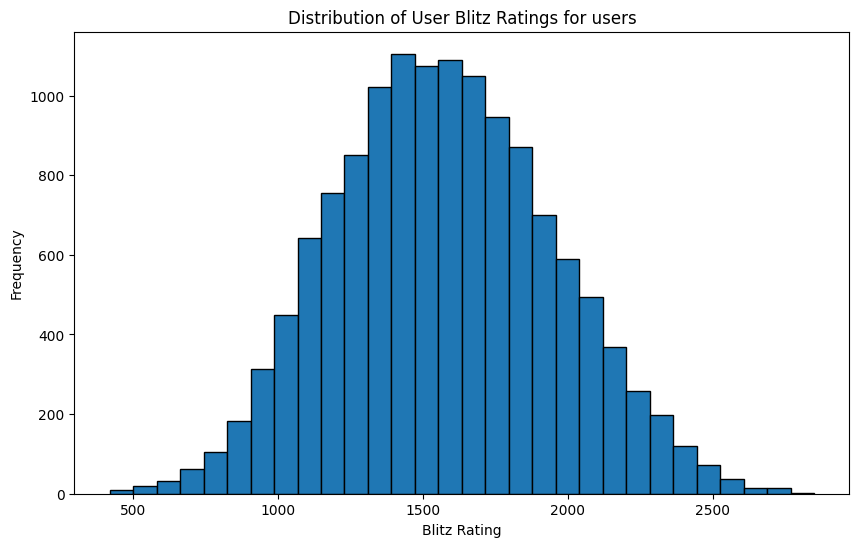

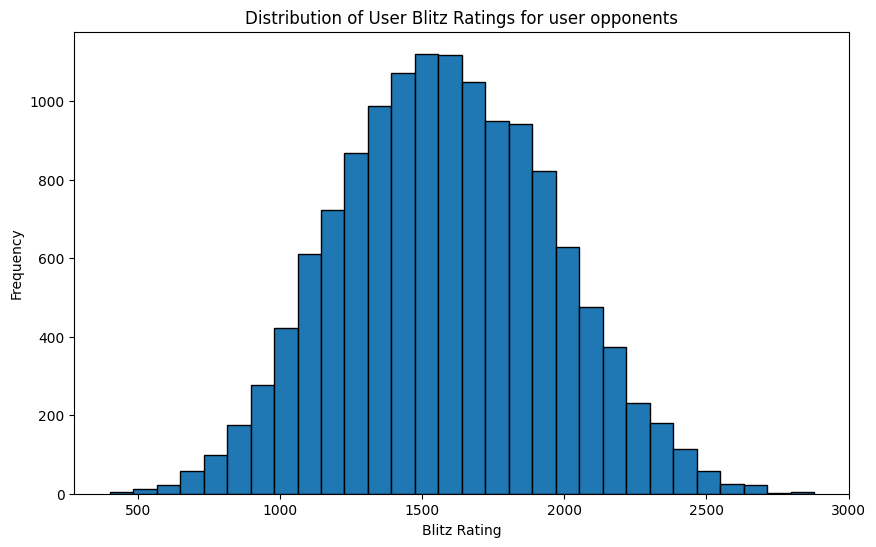

In [9]:

# Replace 'df' with the name of your DataFrame if it's different
plt.figure(figsize=(10, 6))
plt.hist(df['user_blitz_rating'], bins=30, edgecolor='black')
plt.title('Distribution of User Blitz Ratings for users')
plt.xlabel('Blitz Rating')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
plt.hist(df['op_blitz_rating'], bins=30, edgecolor='black')
plt.title('Distribution of User Blitz Ratings for user opponents')
plt.xlabel('Blitz Rating')
plt.ylabel('Frequency')
plt.show()


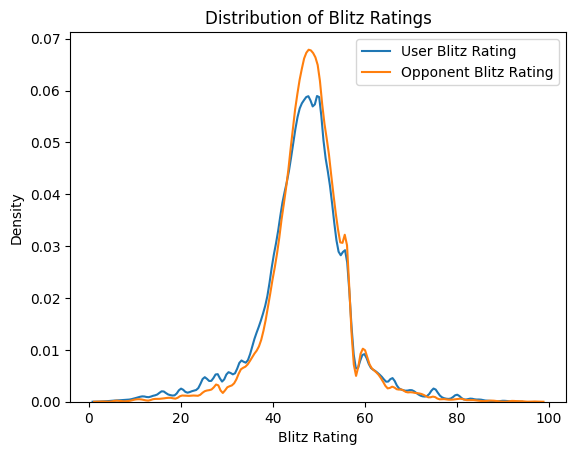

In [10]:

sns.kdeplot(df['user_win_rate'], label='User Blitz Rating', bw_adjust=0.5)
sns.kdeplot(df['op_win_rate'], label='Opponent Blitz Rating', bw_adjust=0.5)

# Add more columns as needed
# sns.kdeplot(df['another_column'], label='Another Rating', bw_adjust=0.5)

# Set the title and labels
plt.title('Distribution of Blitz Ratings')
plt.xlabel('Blitz Rating')
plt.ylabel('Density')
plt.legend()  # Show legend to differentiate each line
plt.show()

This indicates that indeed for the most part, players are matched against players in their own rating bracket so our data collection was effective.

Interestingly enough, our user's seemed to be matched up againsgt higher rated opponents!

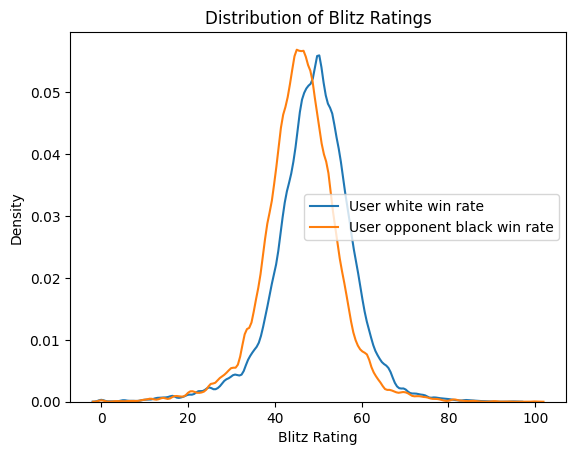

In [11]:
sns.kdeplot(df['user_white_win_rate'], label='User white win rate', bw_adjust=0.5)
sns.kdeplot(df['op_black_win_rate'], label='User opponent black win rate', bw_adjust=0.5)


# Set the title and labels
plt.title('Distribution of Blitz Ratings')
plt.xlabel('Blitz Rating')
plt.ylabel('Density')
plt.legend()  # Show legend to differentiate each line
plt.show()

We can probably generalize that players playinng white has a higher win rate than those playing black.

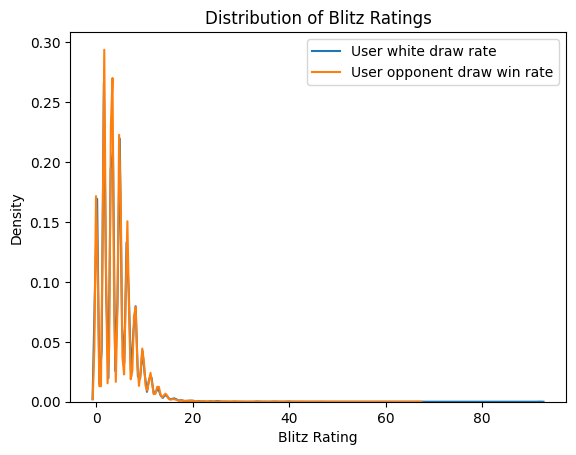

In [12]:
sns.kdeplot(df['user_white_draw_rate'], label='User white draw rate', bw_adjust=0.5)
sns.kdeplot(df['op_black_draw_rate'], label='User opponent draw win rate', bw_adjust=0.5)


# Set the title and labels
plt.title('Distribution of Blitz Ratings')
plt.xlabel('Blitz Rating')
plt.ylabel('Density')
plt.legend()  # Show legend to differentiate each line
plt.show()

Seems like the draw rate is the same as two lines on the graph are completely overlapped. It is probably safe to say that players playing either color have an equal chance of drawing.

In [13]:
print(df['op_top_eco'].value_counts())
print(df['op_second_eco'].value_counts())

op_top_eco
B01            1281
C50            1221
A40             903
D00             894
C00             762
A00             759
B00             759
B10             508
C20             488
D02             488
C44             449
C41             409
B20             303
C42             297
B30             249
C23             228
B06             222
C40             205
B50             186
nonStandard     171
B21             159
A04             150
B40             145
A01             133
C25             122
A45             120
B23             112
B12             112
A02              90
A43              87
A10              85
C47              81
B02              79
D01              69
B22              65
C21              62
B13              57
B27              51
A20              48
B32              43
C02              43
D20              37
C45              36
A06              34
C46              33
C30              33
B90              31
C34              26
B28              25
C62      

Seems like there's some favorite game openings among our dataset! Hopefully they will be useful in our modeling process.

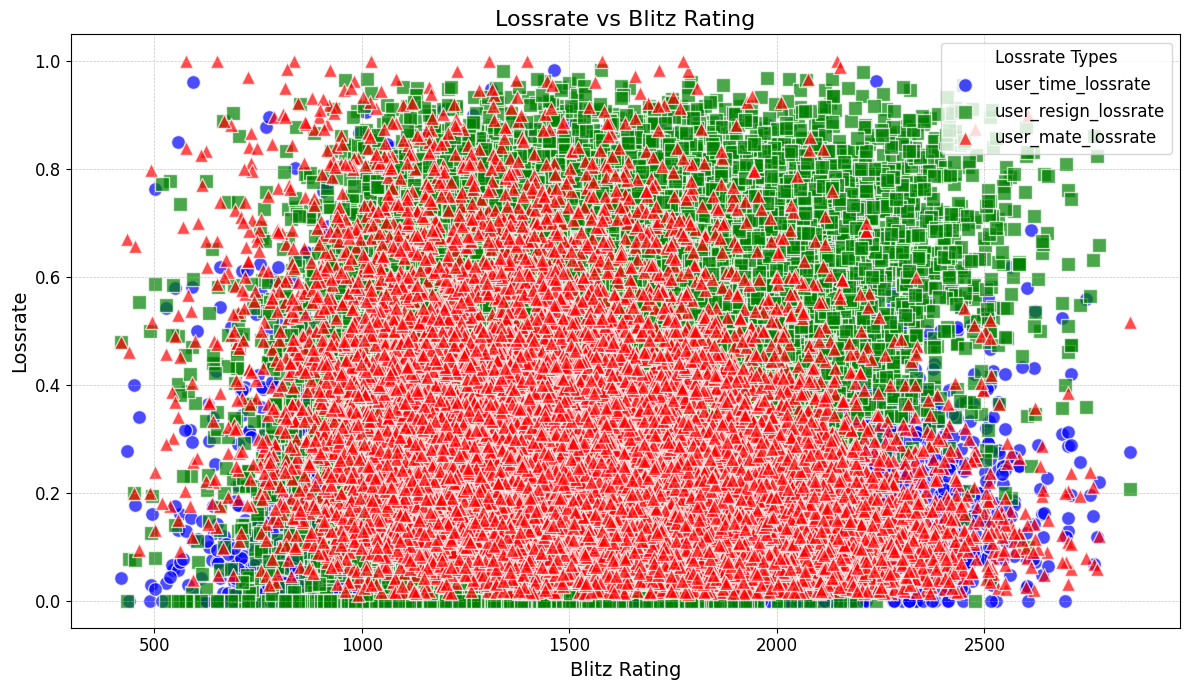

In [14]:
# Set the figure size
plt.figure(figsize=(12, 7))

# Plot each lossrate column as a scatter plot
plt.scatter(
    df['user_blitz_rating'],
    df['user_time_lossrate'],
    color='blue',
    marker='o',
    label='user_time_lossrate',
    alpha=0.7,  # Transparency for better visibility
    edgecolors='w',  # White edge for markers
    s=100  # Marker size
)

plt.scatter(
    df['user_blitz_rating'],
    df['user_resign_lossrate'],
    color='green',
    marker='s',
    label='user_resign_lossrate',
    alpha=0.7,
    edgecolors='w',
    s=100
)

plt.scatter(
    df['user_blitz_rating'],
    df['user_mate_lossrate'],
    color='red',
    marker='^',
    label='user_mate_lossrate',
    alpha=0.7,
    edgecolors='w',
    s=100
)

# Adding title and axis labels
plt.title('Lossrate vs Blitz Rating', fontsize=16)
plt.xlabel('Blitz Rating', fontsize=14)
plt.ylabel('Lossrate', fontsize=14)

# Adding a legend with title
plt.legend(title='Lossrate Types', fontsize=12, title_fontsize=12)

# Adding grid for better readability
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)

# Customize ticks (optional)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Adjust layout for neatness
plt.tight_layout()

# Save the plot as an image (optional)
plt.savefig('lossrate_vs_blitz_rating_scatter.png', dpi=300)

# Display the plot
plt.show()

There seems to be a relationship among the the higher rated players that they lose more by resigning than by time or getting checkmated.

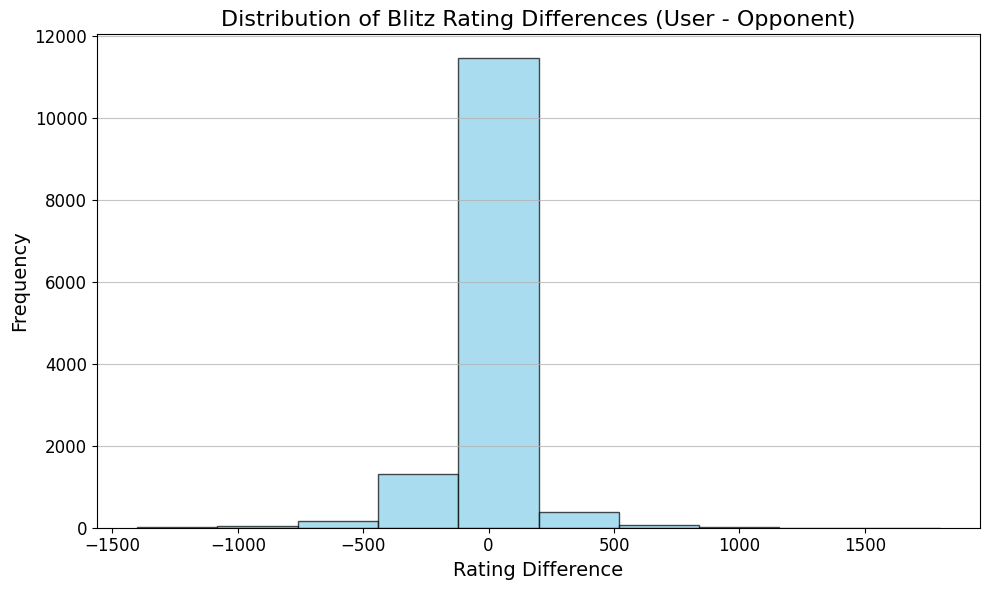

In [15]:
rating_difference = df['user_blitz_rating'] - df['op_blitz_rating']
# Set the figure size
plt.figure(figsize=(10, 6))

# Plot the histogram directly using the calculated differences
plt.hist(
    df['user_blitz_rating'] - df['op_blitz_rating'],  # Difference calculation
    bins=10,                                         # Number of bins
    color='skyblue',                                 # Bar color
    edgecolor='black',                               # Bar edge color
    alpha=0.7                                        # Transparency
)

# Adding title and axis labels
plt.title('Distribution of Blitz Rating Differences (User - Opponent)', fontsize=16)
plt.xlabel('Rating Difference', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Adding grid for better readability
plt.grid(axis='y', alpha=0.75)

# Customize tick labels (optional)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Adjust layout to prevent clipping
plt.tight_layout()

# Save the plot as an image (optional)
plt.savefig('rating_difference_histogram.png', dpi=300)

# Display the plot
plt.show()


Now lets move on making the data readable to models:

Here is label encoding on our eco features

In [16]:
columns_to_encode = ['user_top_eco', 'user_second_eco', 'user_top_winrate_eco', 'user_second_winrate_eco', 'op_top_eco', 'op_second_eco', 'op_top_winrate_eco', 'op_second_winrate_eco']
  
# Initialize the label encoder
label_encoders = {}

# Perform label encoding
for column in columns_to_encode:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

# Save the encoded data to a new CSV file (optional)

df.head(10)

,user_id,user_win_rate,user_lose_rate,user_draw_rate,user_game_count,user_blitz_rating,user_rating_bin,user_white_win_rate,user_white_lose_rate,user_white_draw_rate,user_white_game_count,user_black_win_rate,user_black_lose_rate,user_black_draw_rate,user_black_game_count,user_top_eco,user_second_eco,user_top_winrate_eco,user_second_winrate_eco,user_mate_winrate,user_resign_winrate,user_time_winrate,user_mate_lossrate,user_resign_lossrate,user_time_lossrate,user_average_game_len,user_rating_deviation,user_blitz_total_games,user_best_win_1,user_best_win_2,user_best_win_3,op_id,op_win_rate,op_lose_rate,op_draw_rate,op_game_count,op_blitz_rating,op_white_win_rate,op_white_lose_rate,op_white_draw_rate,op_white_game_count,op_black_win_rate,op_black_lose_rate,op_black_draw_rate,op_black_game_count,op_top_eco,op_second_eco,op_top_winrate_eco,op_second_winrate_eco,op_mate_winrate,op_resign_winrate,op_time_winrate,op_mate_lossrate,op_resign_lossrate,op_time_lossrate,op_average_game_len,op_rating_deviation,op_blitz_total_games,op_best_win_1,op_best_win_2,op_best_win_3,game_result
0,kamal_balaiannnnn,50.0,48.0,2.0,100.0,1077.0,1060-1079,47.692,50.769,1.538,65.0,43.333,55.000,1.667,60.0,85,107,94,43,0.386,0.439,0.158,0.545,0.167,0.258,367.0,56.63,422.0,1220.0,1205.0,1202.0,TIMFAKS,54.0,39.0,7.0,100.0,1119.0,45.161,48.387,6.452,62.0,47.619,47.619,4.762,63.0,92,122,267,221,0.379,0.414,0.172,0.433,0.167,0.400,272.0,45.28,1984.0,1412.0,1410.0,1390.0,-1.0
1,jenzetti,48.0,49.0,3.0,100.0,1359.0,1340-1359,51.562,45.312,3.125,64.0,45.902,54.098,0.000,61.0,95,61,13,198,0.328,0.475,0.197,0.355,0.290,0.355,388.0,45.00,2010.0,1517.0,1512.0,1500.0,Amisree,48.0,49.0,3.0,100.0,1354.0,56.452,38.710,4.839,62.0,42.857,57.143,0.000,63.0,91,103,180,168,0.161,0.516,0.242,0.633,0.000,0.350,381.0,78.88,208.0,1460.0,1445.0,1440.0,-1.0
2,hermar,47.0,51.0,2.0,100.0,1609.0,1600-1619,50.000,48.333,1.667,60.0,44.615,46.154,9.231,65.0,116,25,263,198,0.271,0.525,0.203,0.203,0.407,0.390,379.0,49.82,1582.0,1729.0,1704.0,1687.0,Rufusikik9999,57.0,36.0,6.0,100.0,1603.0,48.438,45.312,6.250,64.0,50.820,42.623,6.557,61.0,93,122,110,238,0.355,0.435,0.210,0.327,0.491,0.145,410.0,46.78,1023.0,1624.0,1618.0,1616.0,-1.0
3,HakobN,53.0,43.0,4.0,100.0,2379.0,2360-2379,59.375,32.812,7.812,64.0,45.902,45.902,8.197,61.0,45,41,2,247,0.197,0.636,0.167,0.245,0.714,0.041,277.0,46.15,7861.0,2782.0,2665.0,2664.0,NikolaDubovik,51.0,37.0,12.0,100.0,2088.0,50.820,37.705,11.475,61.0,42.188,48.438,9.375,64.0,35,2,0,198,0.345,0.310,0.293,0.444,0.444,0.111,253.0,47.09,16413.0,2710.0,2700.0,2697.0,1.0
4,Castillo123458789102,28.0,65.0,6.0,100.0,1057.0,1040-1059,30.357,58.929,10.714,56.0,44.928,44.928,10.145,69.0,32,25,48,9,0.375,0.375,0.208,0.281,0.547,0.141,329.0,52.74,671.0,1227.0,1216.0,1198.0,Bauti_Bomben,45.0,48.0,7.0,100.0,1063.0,57.143,38.095,4.762,63.0,43.548,50.000,6.452,62.0,78,113,230,131,0.349,0.302,0.333,0.345,0.418,0.236,358.0,45.23,2899.0,1823.0,1503.0,1456.0,-1.0
5,anacondaismypet,48.0,46.0,6.0,100.0,2235.0,2220-2239,53.226,38.710,8.065,62.0,53.968,42.857,3.175,63.0,120,90,172,337,0.179,0.627,0.194,0.216,0.647,0.137,448.0,46.97,799.0,2357.0,2350.0,2340.0,LomakinaGV,56.0,39.0,4.0,100.0,2125.0,60.317,36.508,3.175,63.0,48.387,43.548,8.065,62.0,5,4,0,45,0.088,0.618,0.279,0.120,0.540,0.340,413.0,45.06,9781.0,2313.0,2309.0,2296.0,1.0
6,Julio2019,25.0,73.0,2.0,100.0,1609.0,1600-1619,30.159,66.667,3.175,63.0,30.645,69.355,0.000,62.0,114,41,279,3,0.053,0.211,0.605,0.329,0.447,0.082,290.0,45.05,7457.0,2362.0,2341.0,2327.0,Remigio2023,44.0,52.0,4.0,100.0,1905.0,54.098,36.066,9.836,61.0,48.438,46.875,4.688,64.0,6,4,202,253,0.266,0.328,0.391,0.077,0.558,0.327,282.0,45.03,10470.0,2524.0,2418.0,2393.0,-1.0
7,kapri8,61.0,37.0,2.0,100.0,1213.0,1200-1219,57.377,37.705,4.918,61.0,51.562,48.438,0.000,64.0,32,140,169,3,0.309,0.529,0.132,0.111,0.852,0.019,449.0,45.30,1153.0,1336.0,1323.0,1320.0,ufyljybot,48.0,43.0,9.0,100.0,1366.0,40.678,49.153,10.169,59.0,48.485,43.939,7.576,66.0,115,91,13,207,0.214,0.518,0.1

Most games have low rating difference! Yay! The users are playing more lower rated players than higher rated. Perhaps more users are winning the games against their opponents in our dataset.

In [17]:
df_numeric = df.select_dtypes(include=[np.number])
label_corr = df_numeric.corr()["game_result"].drop("game_result")

# Display as a DataFrame for clarity
# correlation_with_label = label_corr.to_frame(name="Correlation with Label")

correlation_with_label = label_corr.abs().sort_values(ascending=False).to_frame(name="Absolute Correlation with Label")
# correlation_with_label["Correlation"] = label_corr.reindex(correlation_with_label.index)

correlation_with_label_sorted = correlation_with_label.sort_index()
print(correlation_with_label_sorted)
print(correlation_with_label)

                         Absolute Correlation with Label
op_average_game_len                             0.050307
op_best_win_1                                   0.023242
op_best_win_2                                   0.023651
op_best_win_3                                   0.023934
op_black_draw_rate                              0.009895
op_black_game_count                             0.014219
op_black_lose_rate                              0.049148
op_black_win_rate                               0.054712
op_blitz_rating                                 0.021390
op_blitz_total_games                            0.000675
op_draw_rate                                    0.002047
op_game_count                                   0.016080
op_lose_rate                                    0.112107
op_mate_lossrate                                0.010320
op_mate_winrate                                 0.007071
op_rating_deviation                             0.012261
op_resign_lossrate             

Some of these have very good correlation, lets engineer some useful features and check their correlation as well.

Features on the user versus the opponent's best performance in beating a way higher rated player.

In [18]:

df['op_average_best_win'] = df[['op_best_win_1', 'op_best_win_2', 'op_best_win_3']].mean(axis=1)
df['user_average_best_win'] = df[['user_best_win_1', 'user_best_win_2', 'user_best_win_3']].mean(axis=1)
df['best_average_win_diff'] = (df['op_average_best_win'] - df['user_average_best_win'])
df['best_win_diff'] = df['user_best_win_1'] - df['op_best_win_1']

Features for each player in comparison for them losing on time versus the average time it take for them to finish a game overall.

In [19]:
df['user_lose_len'] = df['user_time_lossrate'] / df['op_average_game_len'] 
df['op_lose_len'] = df['op_time_lossrate'] / df['user_average_game_len']

Check to see if there is a relationship between most commonly played openings versus openings with most won games via cross player examination

In [20]:

def check_user_in_op_winrate(row):
    """Check if user's top two ECOs are in opponent's top winrate ECOs."""
    user_eco_set = {row['user_top_eco'], row['user_second_eco']}
    op_winrate_eco_set = {row['op_top_winrate_eco'], row['op_second_winrate_eco']}
    return int(bool(user_eco_set & op_winrate_eco_set))  # Intersection check

def check_op_in_user_winrate(row):
    """Check if opponent's top two ECOs are in user's top winrate ECOs."""
    op_eco_set = {row['op_top_eco'], row['op_second_eco']}
    user_winrate_eco_set = {row['user_top_winrate_eco'], row['user_second_winrate_eco']}
    return int(bool(op_eco_set & user_winrate_eco_set))  # Intersection check


df['user_eco_in_op_winrate'] = df.apply(check_user_in_op_winrate, axis=1)
df['op_eco_in_user_winrate'] = df.apply(check_op_in_user_winrate, axis=1)

Features to exam each player's stats as one color in comparison to the other to see if there is performance disadvantage, E.G. if one user wins a lot playing white and their opponent loses a lot playing black. 

In [21]:
df['user_white_performance'] = df['user_white_win_rate'] * (df['op_black_lose_rate'])
df['user_black_performance'] = df['user_black_win_rate'] * (df['op_white_lose_rate'])
df['op_white_performance'] = df['op_white_win_rate'] * (df['user_black_lose_rate'])
df['op_black_performance'] = df['op_black_win_rate'] * (df['user_white_lose_rate'])

Features trying to capture the relationship for draws.

In [22]:
df['high_draw_rate'] = ((df['user_draw_rate'] > 5.0) & (df['op_draw_rate'] > 5.0)).astype(int)
df['draw_rate'] = df['user_draw_rate'] +df['op_draw_rate']
df['combined_draw4'] = (df['user_white_draw_rate'] + df['op_black_draw_rate'] + df['user_black_draw_rate'] + df['op_white_draw_rate'])/4

Features examing each player's win vs lose through the time constraints

In [23]:
df['user_time_performance'] = df['user_time_winrate'] * df['op_time_lossrate']
df['op_time_performance'] = df['op_time_winrate'] * df['user_time_lossrate']

Features examining each player's win and loses overall in comparison to each other

In [24]:
df['user_performace'] = df['user_win_rate'] * (df['op_lose_rate'])
df['op_performance'] = df['op_win_rate'] * (df['user_lose_rate'])

Feature to exam the difference in skill level via rating

In [25]:
df['rating_diff'] = df['user_blitz_rating'] - df['op_blitz_rating']

Features examing each player's win vs lose through one's probability of resigning

In [26]:
df['user_resign_perf'] = (df['user_resign_winrate'] * df['op_resign_lossrate'])
df['op_resign_perf'] = (df['op_resign_winrate'] * df['user_resign_lossrate'])

Feature examing how many games each players have played in comparison to each other

In [27]:
df['game_count_ratio'] = df['user_game_count'] / df['op_game_count']

Features examing each player's win vs lose through one's ability of winning by checkmate

In [28]:
df['user_mate_perf'] = df['user_mate_winrate'] * df['op_mate_lossrate']
df['op_mate_perf'] = df['op_mate_winrate'] * df['user_mate_lossrate']

Feature comparing the player's rating stability in relation to each other

In [29]:
df['deviation_compare'] = df['user_rating_deviation'] / df['op_rating_deviation']

Feature comparing the average game length of each player.

In [30]:
df['compare_len'] = df['user_average_game_len'] / df['op_average_game_len']

In [31]:
df_numeric = df.select_dtypes(include=[np.number])
label_corr = df_numeric.corr()["game_result"].drop("game_result")

# Display as a DataFrame for clarity
# correlation_with_label = label_corr.to_frame(name="Correlation with Label")

correlation_with_label = label_corr.abs().sort_values(ascending=False).to_frame(name="Absolute Correlation with Label")
# correlation_with_label["Correlation"] = label_corr.reindex(correlation_with_label.index)

correlation_with_label_sorted = correlation_with_label.sort_index()
print(correlation_with_label_sorted)
print(correlation_with_label)

                         Absolute Correlation with Label
best_average_win_diff                           0.063808
best_win_diff                                   0.057021
combined_draw4                                  0.025300
compare_len                                     0.009055
deviation_compare                               0.020500
draw_rate                                       0.020362
game_count_ratio                                0.023570
high_draw_rate                                  0.006984
op_average_best_win                             0.023714
op_average_game_len                             0.050307
op_best_win_1                                   0.023242
op_best_win_2                                   0.023651
op_best_win_3                                   0.023934
op_black_draw_rate                              0.009895
op_black_game_count                             0.014219
op_black_lose_rate                              0.049148
op_black_performance           

Seems like we have some new features that have higher correlation.

Through trial and error, we have decided these features should be dropped to achieve the optimal model.

In [32]:
remove = [
    'user_rating_bin', 'user_top_eco',
       'user_second_eco', 'user_top_winrate_eco', 'user_second_winrate_eco', 'op_top_eco',
       'op_second_eco', 'op_top_winrate_eco', 'op_second_winrate_eco', 'user_best_win_1','user_best_win_2', 'user_best_win_3',
       'op_best_win_1', 'op_best_win_2', 'op_best_win_3', 'user_white_win_rate', 'op_black_lose_rate', 'user_black_win_rate', 
       'op_white_lose_rate', 'op_white_win_rate', 'user_black_lose_rate', 'op_black_win_rate', 'user_white_lose_rate',
       'user_win_rate', 'user_lose_rate', 'op_win_rate', 'op_lose_rate', 'user_blitz_rating', 'op_blitz_rating',
       'op_black_game_count','user_black_game_count','op_white_game_count', 'user_white_game_count', 
       'user_blitz_total_games', 'op_blitz_total_games', 
       'op_game_count', 'user_game_count', 
       'op_draw_rate', 'user_draw_rate', 'op_time_lossrate', 'user_time_lossrate',
       'op_mate_winrate', 'user_mate_winrate', 'op_white_draw_rate', 'op_black_draw_rate', 'user_white_draw_rate', 'user_black_draw_rate',
       'user_eco_in_op_winrate', 'op_eco_in_user_winrate', 
      'op_average_game_len', 'user_average_game_len',
       'op_mate_lossrate', 'user_mate_lossrate', 
        'op_resign_lossrate', 'user_resign_lossrate',
        'op_resign_winrate', 'user_resign_winrate', 'best_average_win_diff',
        'high_draw_rate', 'draw_rate'
       
]

In [33]:
df = df.drop(columns=remove)

In [34]:
df.to_csv('cleaned.csv', index = False)

Our first Model: KNN

In [35]:
import pandas as pd
import numpy
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score

data = pd.read_csv('cleaned.csv')

# our features
X = data.drop(columns=['game_result', 'user_id', 'op_id'])

#our label
y = data['game_result']   # the last column

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Initialize the KNN model
knn = KNeighborsClassifier()

# Set up hyperparameter grid for tuning
param_grid = {
    'n_neighbors': [150, 200, 300],          # Two choices for number of neighbors
    'weights': ['uniform', 'distance']  # Two choices for weighting
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best model
best_knn = grid_search.best_estimator_

# Make predictions with the best model
y_pred = best_knn.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Best Parameters:", grid_search.best_params_)
print("Accuracy with Best Parameters:", accuracy)

Best Parameters: {'n_neighbors': 200, 'weights': 'uniform'}
Accuracy with Best Parameters: 0.5727029438001784


Ous Second Model: RDF

In [36]:
import pandas as pd
import numpy
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score

data = pd.read_csv('cleaned.csv')

# our features
X = data.drop(columns=['game_result', 'user_id', 'op_id'])

#our label
y = data['game_result']   # the last column

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Initialize the KNN model
rf = RandomForestClassifier(random_state=42)

# Set up hyperparameter grid for tuning
param_grid = {
    'n_estimators': [275,300, 325],  # Number of trees in the forest
    'max_depth': [11, 12, 13]       # Maximum depth of the trees
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best model
best_knn = grid_search.best_estimator_

# Make predictions with the best model
y_pred = best_knn.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Best Parameters:", grid_search.best_params_)
print("Accuracy with Best Parameters:", accuracy)

Best Parameters: {'max_depth': 11, 'n_estimators': 300}
Accuracy with Best Parameters: 0.5941123996431757


Our Third Model: XGB

In [37]:
from xgboost import XGBClassifier

data = pd.read_csv('cleaned.csv')

# our features
X = data.drop(columns=['game_result', 'user_id', 'op_id'])

#our label
y = data['game_result']   # the last column
y = y.map({-1: 0, 0: 1, 1: 2})

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


param_grid = {
    'learning_rate': [0.05, 0.1],       # Step size shrinkage
    'max_depth': [4, 6],                # Maximum tree depth
    'n_estimators': [100, 300],         # Number of trees
    'subsample': [0.8, 1.0],            # Subsample ratio of the training instances
    'colsample_bytree': [0.8, 1.0]      # Subsample ratio of columns when constructing each tree
}
model = XGBClassifier(random_state=42)

grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring='accuracy',
    cv=3,               # 5-fold cross-validation
    verbose=1,          # Verbosity level
    n_jobs=1           # Utilize all available CPU cores
)

grid_search.fit(X_train, y_train)

best_xgb = grid_search.best_estimator_
y_pred = best_xgb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Best Parameters:", grid_search.best_params_)
print("Accuracy with Best Parameters:", accuracy)

Fitting 3 folds for each of 32 candidates, totalling 96 fits
Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 100, 'subsample': 1.0}
Accuracy with Best Parameters: 0.5883519206939282


Our Final Model to Test

In [38]:
import time
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from category_encoders import TargetEncoder
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, InputLayer
from tensorflow.keras import callbacks
from tensorflow.keras import optimizers, losses, metrics

# Load data
data = pd.read_csv('cleaned.csv')

# Map the labels from [-1, 0, 1] to [0, 1, 2]
label_mapping = {-1: 0, 0: 1, 1: 2}
data['game_result'] = data['game_result'].map(label_mapping)

# Define features and labels
X = data.drop(columns=['game_result', 'user_id', 'op_id'])
y = data['game_result']  # No one-hot encoding required

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Identify categorical columns
categorical_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()

# Apply Target Encoding
target_encoder = TargetEncoder(cols=categorical_cols)
X_train_encoded = target_encoder.fit_transform(X_train, y_train)
X_test_encoded = target_encoder.transform(X_test)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_test_scaled = scaler.transform(X_test_encoded)

# Define the neural network model
nn_model = Sequential()

# Input layer
nn_model.add(InputLayer(input_shape=(X_train_scaled.shape[1],), name='input'))

# Hidden layers
nn_model.add(Dense(units=128, activation='relu', name='hl_1'))
nn_model.add(Dropout(0.2))

nn_model.add(Dense(units=64, activation='relu', name='hl_2'))
nn_model.add(Dropout(0.1))

nn_model.add(Dense(units=32, activation='relu', name='hl_3'))
nn_model.add(Dropout(0.1))

# Output layer
nn_model.add(Dense(units=3, activation='softmax', name='output'))  # 3 units for 3 classes

# Compile the model with a lower learning rate
nn_model.compile(
    optimizer=optimizers.Adam(learning_rate=0.001),
    loss=losses.SparseCategoricalCrossentropy(),
    metrics=[metrics.SparseCategoricalAccuracy()]
)

# Custom callback for logging progress
class ProgBarLoggerNEpochs(callbacks.Callback):
    def __init__(self, num_epochs: int, every_n: int = 50):
        self.num_epochs = num_epochs
        self.every_n = every_n

    def on_epoch_end(self, epoch, logs=None):
        if (epoch + 1) % self.every_n == 0:
            log_message = f"Epoch [{epoch + 1}/{self.num_epochs}]"
            log_details = ", ".join([f"{k.capitalize()}: {v:.4f}" for k, v in logs.items()])
            print(f"{log_message}, {log_details}")

# Early stopping callback
early_stop = callbacks.EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

# Train the model
t0 = time.time()  # Start time
num_epochs = 1000

history = nn_model.fit(
    X_train_scaled,
    y_train,
    epochs=num_epochs,
    validation_split=0.2,
    verbose=0,  # Disable default progress bar
    callbacks=[ProgBarLoggerNEpochs(num_epochs, every_n=50), early_stop],
)
t1 = time.time()  # End time

print(f"Elapsed time: {t1 - t0:.2f}s")

# Evaluate the model on the test set
loss, accuracy = nn_model.evaluate(X_test_scaled, y_test, verbose=0)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")

# Predictions
probability_predictions = nn_model.predict(X_test_scaled)
predicted_classes = probability_predictions.argmax(axis=1)

# Evaluate performance using classification metrics
print(confusion_matrix(y_test, predicted_classes))
print(classification_report(y_test, predicted_classes))

c:\Users\tiazh\OneDrive\CS\CS506\cs506_final_project\.venv\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Elapsed time: 13.30s
Test Loss: 0.7945, Test Accuracy: 0.5858
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
[[1587    0  258]
 [ 102    0   32]
 [1001    0  383]]
              precision    recall  f1-score   support

           0       0.59      0.86      0.70      1845
           1       0.00      0.00      0.00       134
           2       0.57      0.28      0.37      1384

    accuracy                           0.59      3363
   macro avg       0.39      0.38      0.36      3363
weighted avg       0.56      0.59      0.54      3363



c:\Users\tiazh\OneDrive\CS\CS506\cs506_final_project\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\tiazh\OneDrive\CS\CS506\cs506_final_project\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\tiazh\OneDrive\CS\CS506\cs506_final_project\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf